In [4]:
# import the necessary libraries in Python: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
# Load dataset
df = pd.read_csv("sales_data_with_discounts.csv")

# Show the first few rows of the dataset
df.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [7]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Compute basic statistical measures
mean_values = df[numerical_columns].mean()
median_values = df[numerical_columns].median()
mode_values = df[numerical_columns].mode().iloc[0]
std_dev_values = df[numerical_columns].std()

# Display the calculated statistics
print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)
print("\nStandard Deviation:\n", std_dev_values)


Mean:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

Median:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

Mode:
 Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

Standard Deviation:
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


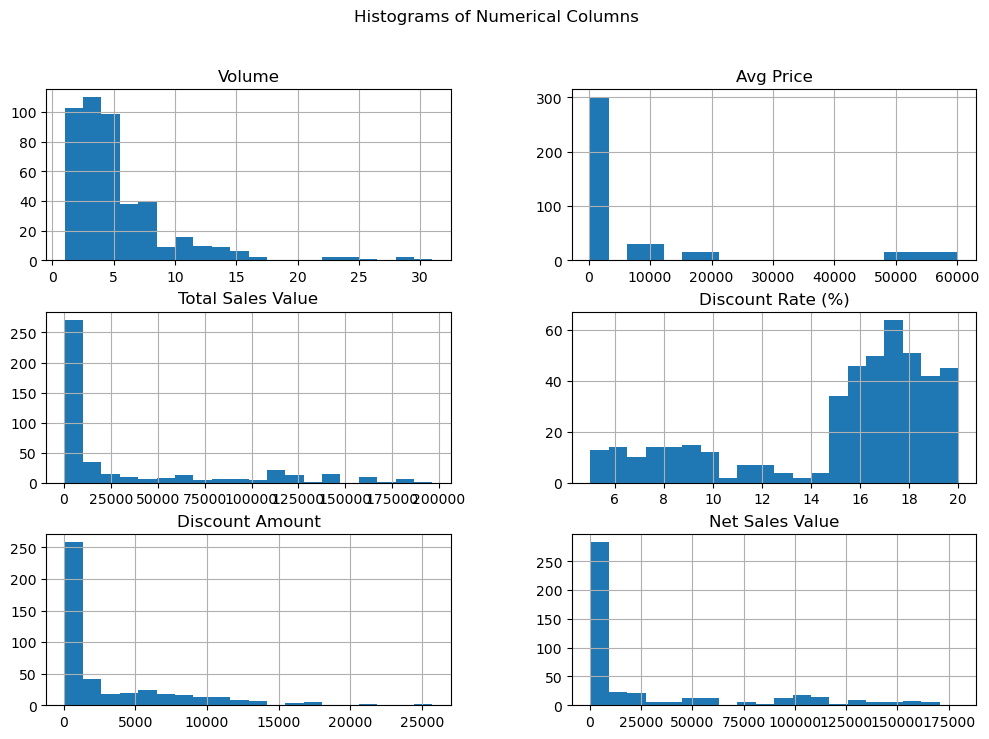

In [8]:
# Plot histograms for each numerical column
df[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Columns')
plt.show()



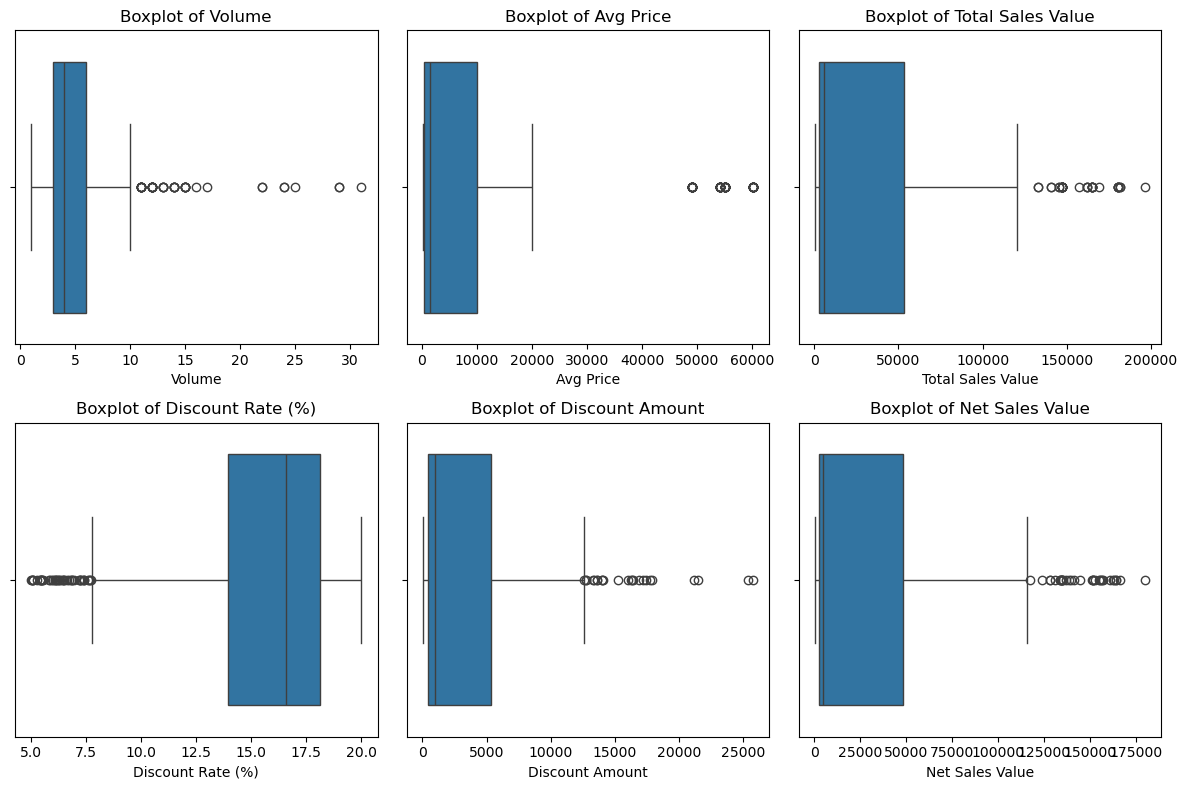

In [9]:
# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Adjust number of rows and columns based on the number of numerical columns
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


ValueError: num must be an integer with 1 <= num <= 6, not 7

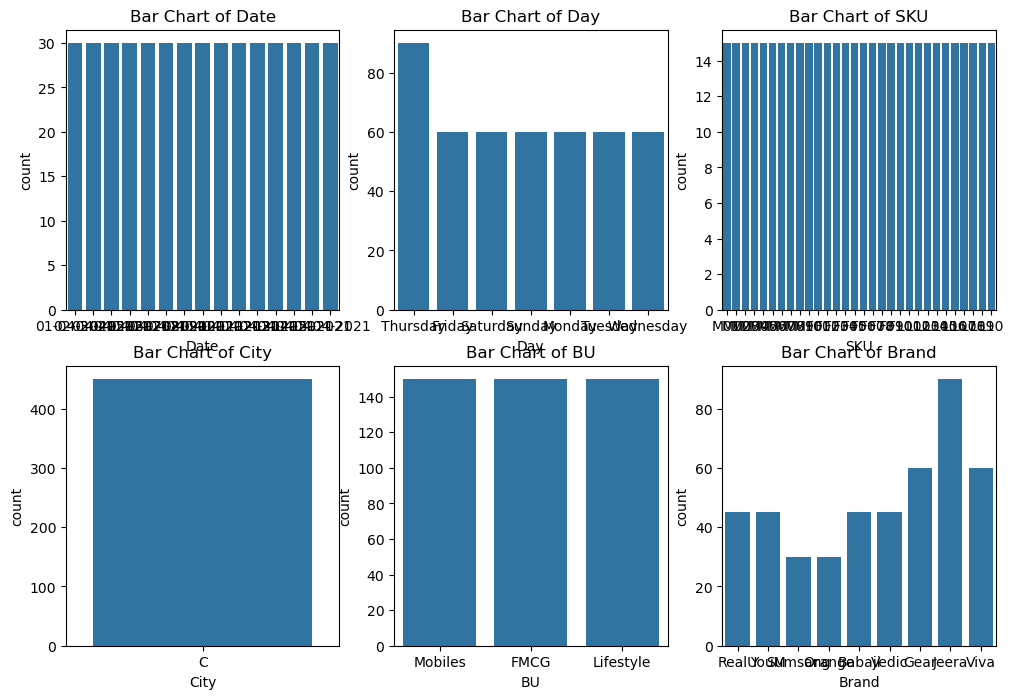

In [11]:
#Visualize the frequency or count of categories in categorical columns.
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create bar charts for each categorical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[column])
    plt.title(f'Bar Chart of {column}')
plt.tight_layout()
plt.show()



         Date       Day  SKU City    Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C  2.350029  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C  1.167129  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C  0.457388  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C  0.220808  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C -0.488932  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0   0.091173           2.925721          -0.830289         3.952816   
1  -0.019570           1.330995          -0.852661         1.849014   
2   0.312659           1.562775          -1.351631         1.622995   
3   0.534146           1.719276          -1.949723         1.113807   
4  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  
0         2.804756  
1         1.271026  
2         1.545675  
3         1.765810  
4        -0.22759

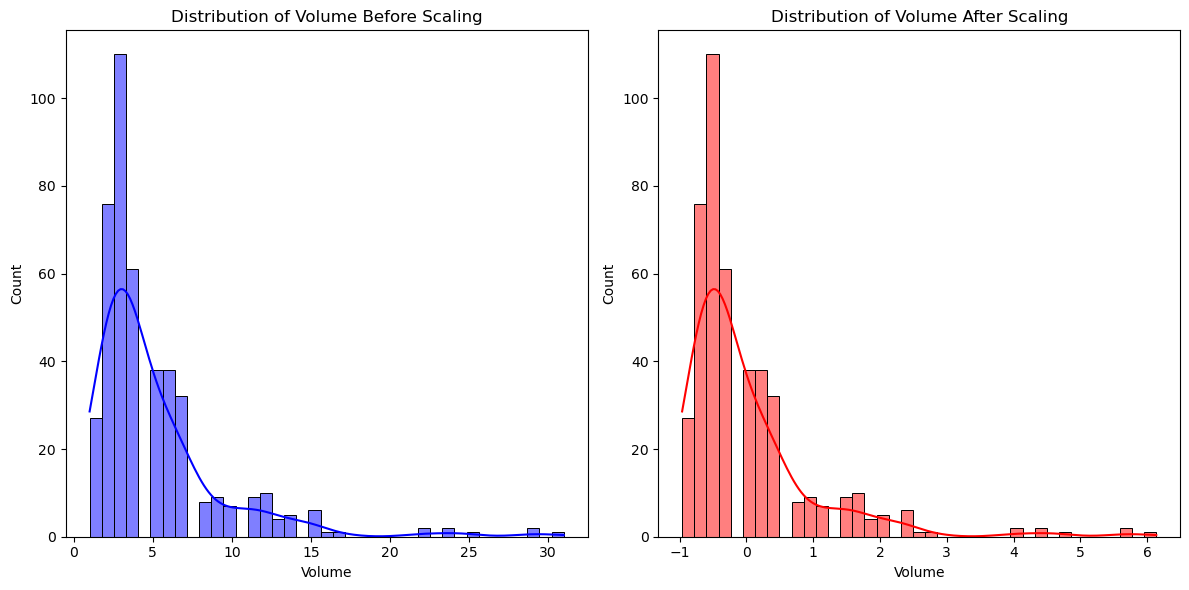

In [12]:
# Scale numerical variables to have a mean of 0 and standard deviation of 1.
#Standardize the numerical columns using Z-score normalization.
# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
df_scaled = df.copy()  # Create a copy of the dataframe to preserve the original data
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Show the first few rows of the scaled dataset
print(df_scaled.head())

# Compare distributions before and after scaling (example for one column)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[numerical_columns[0]], kde=True, color='blue')
plt.title(f'Distribution of {numerical_columns[0]} Before Scaling')

plt.subplot(1, 2, 2)
sns.histplot(df_scaled[numerical_columns[0]], kde=True, color='red')
plt.title(f'Distribution of {numerical_columns[0]} After Scaling')

plt.tight_layout()
plt.show()


In [13]:
# Convert categorical variables into dummy variables using one-hot encoding.
# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Show a portion of the transformed dataset
print(df_encoded.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...

In [ ]:
#Conclison
#In this analysis, we performed descriptive analytics and data preprocessing on the sales and discounts dataset. 
#We computed basic statistical measures like mean, median, mode, and standard deviation for numerical columns, providing insights into the data's central tendency and variability.
#We visualized the data through histograms, boxplots, and bar charts to explore the distribution of numerical and categorical variables. 
#These visualizations helped identify trends, outliers, and imbalances in the dataset.
#we standardized the numerical variables to ensure uniformity in scale, improving their suitability for machine learning models. Finally, we converted categorical variables into dummy variables using one-hot encoding to prepare the data for further analysis and model building.
#These preprocessing steps, including standardization and encoding, are crucial for optimizing machine learning models and ensuring accurate and efficient analysis.#

